In [5]:
%pip install ucimlrepo

from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import matplotlib.pyplot as plt

wine_quality = fetch_ucirepo(id=186)

In [6]:
# df = wine_quality.data.original
# df_test = df[(df['color'] == 'white')]
# df_test = df[1599:]
# print (df_test)

# Testing for color separation
# 1599-6496 is white color

In [7]:
# Task 1
# obtain mean stddev min max 25/50/75% percentiles table

features_df = wine_quality.data.features[1599:]
variables_df = wine_quality.data.targets[1599:]

print("Features")
print(features_df.describe())
print("\n Target variables")
print(variables_df.describe())

# 0,3,8,10

Features
       fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000

<Axes: >

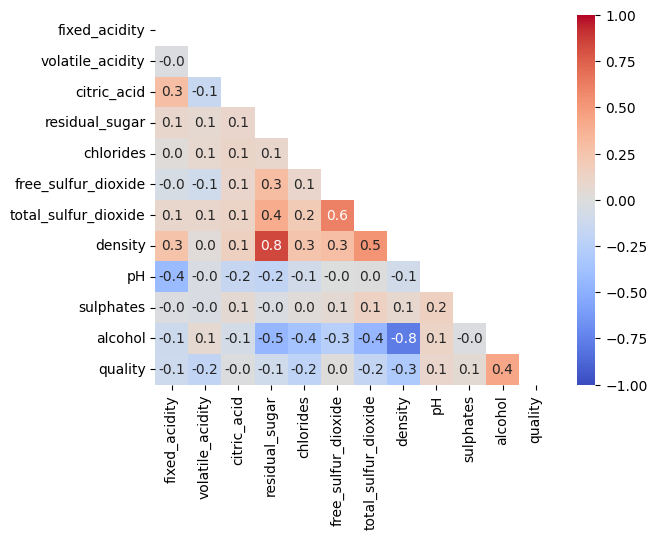

In [8]:
# Task 2
# Correlation matrix
# Target = quality

matrix = pd.concat([features_df, variables_df], axis=1).corr()
sns.heatmap(matrix, cmap='coolwarm', annot=True, fmt=".1f", vmin = -1, vmax = 1, mask=np.triu(matrix))

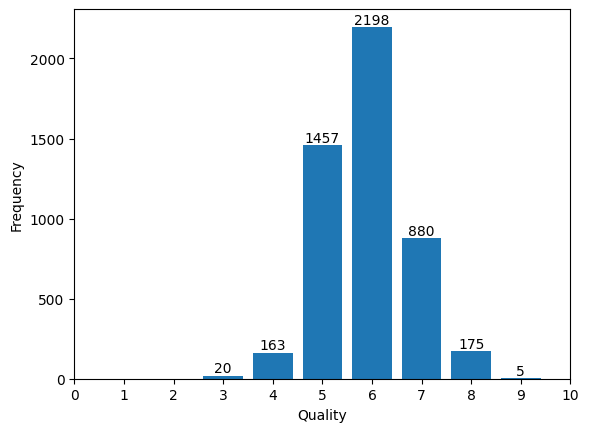

In [9]:
# Task 3
# Histogram of target values (quality)

# histo = variables_df.plot.hist(grid=False)
# histo.set_xlim(0,10)
# histo.set_xticks(range(11))
# histo.set_ylabel('Frequency')
# histo.set_xlabel('Quality')
# histo.bar_label(histo.containers[0])
# histo.plot()

histo = plt.bar(*np.unique(variables_df, return_counts=True))
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.bar_label(histo)
plt.xlim(0,10)
plt.xticks(range(11))
plt.show()

# works better, commented code is a 'true' histogram

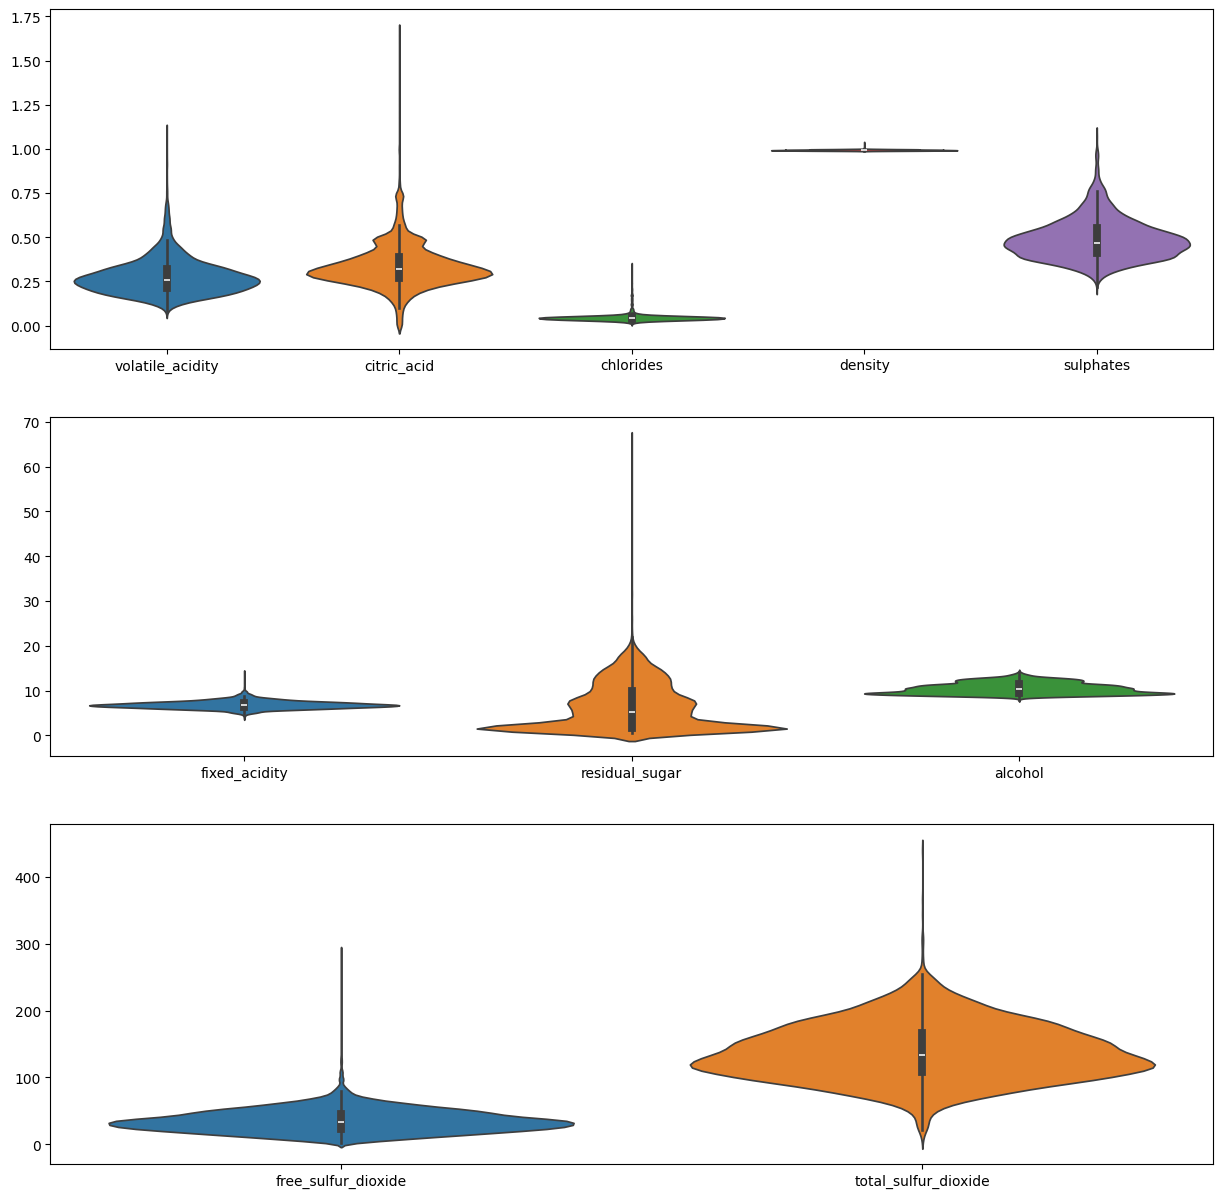

In [10]:
# Task 4
# violin plot of features, each plot visible 11 total

figure, axis = plt.subplots(3, 1, figsize=(15,15))
sns.violinplot(data=features_df.iloc[:, [1,2,4,7,9]], ax=axis[0])
sns.violinplot(data=features_df.iloc[:, [0,3,10]], ax=axis[1])
sns.violinplot(data=features_df.iloc[:, [5,6]], ax=axis[2])
plt.show()

In [25]:
# Task 5
# linear regression model
# inputs = alcohol

model = LinearRegression()

model.fit(features_df[['alcohol']], variables_df)

y_pred = model.predict(features_df[['alcohol']])

print(f'intercept = {model.intercept_}')
print(f'coef = {model.coef_[0]}')
print(f'RMSE = { np.sqrt(mean_squared_error(variables_df, y_pred)) }')
print(f'R^2 = { r2_score(variables_df, y_pred) }')

intercept = [2.5820094]
coef = [0.3134693]
RMSE = 0.7971284628752668
R^2 = 0.18972533274950443


In [26]:
# Task 6
# linear regression model
# inputs = volatile_acidity, alcohol, density

model.fit(features_df[['alcohol', 'volatile_acidity', 'density']], variables_df)

y_pred = model.predict(features_df[['alcohol', 'volatile_acidity', 'density']])

print(f'intercept = {model.intercept_}')
print(f'coef = {model.coef_[0]}')
print(f'RMSE = { np.sqrt(mean_squared_error(variables_df, y_pred)) }')
print(f'R^2 = { r2_score(variables_df, y_pred) }')

intercept = [-36.49861131]
coef = [ 0.39889282 -2.07211594 38.9918867 ]
RMSE = 0.7684872688163131
R^2 = 0.24690635620080092
